In [1]:
#Importing necessary libraries and installing a new package "bioinfokit".
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install bioinfokit

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#Reading a CSV file 'mcdonalds.csv' and storing it as a pandas dataframe 'df'.
df = pd.read_csv(r"C:\Users\rocky\mcdonalds.csv")
#Performing basic exploratory data analysis (EDA) on the 'df' dataframe to get information about its dimensions, data types, null values, and value counts of certain columns.
df.shape
df.head()
df.dtypes
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [3]:
#Checking for the count of below variables
df['Gender'].value_counts()
df['VisitFrequency'].value_counts()
df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [4]:
#Exploring Data
#Replacing some values in the 'Like' column of the dataframe with numeric values using the 'replace()' method.
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
#Defining a function 'labelling()' that applies label encoding on a given column of the dataframe 'df' and returns the modified dataframe. The 'LabelEncoder()' class is imported from scikit-learn.
from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df
#Applying label encoding on a list of categorical columns 'cat' using the 'labelling()' function defined earlier.
cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


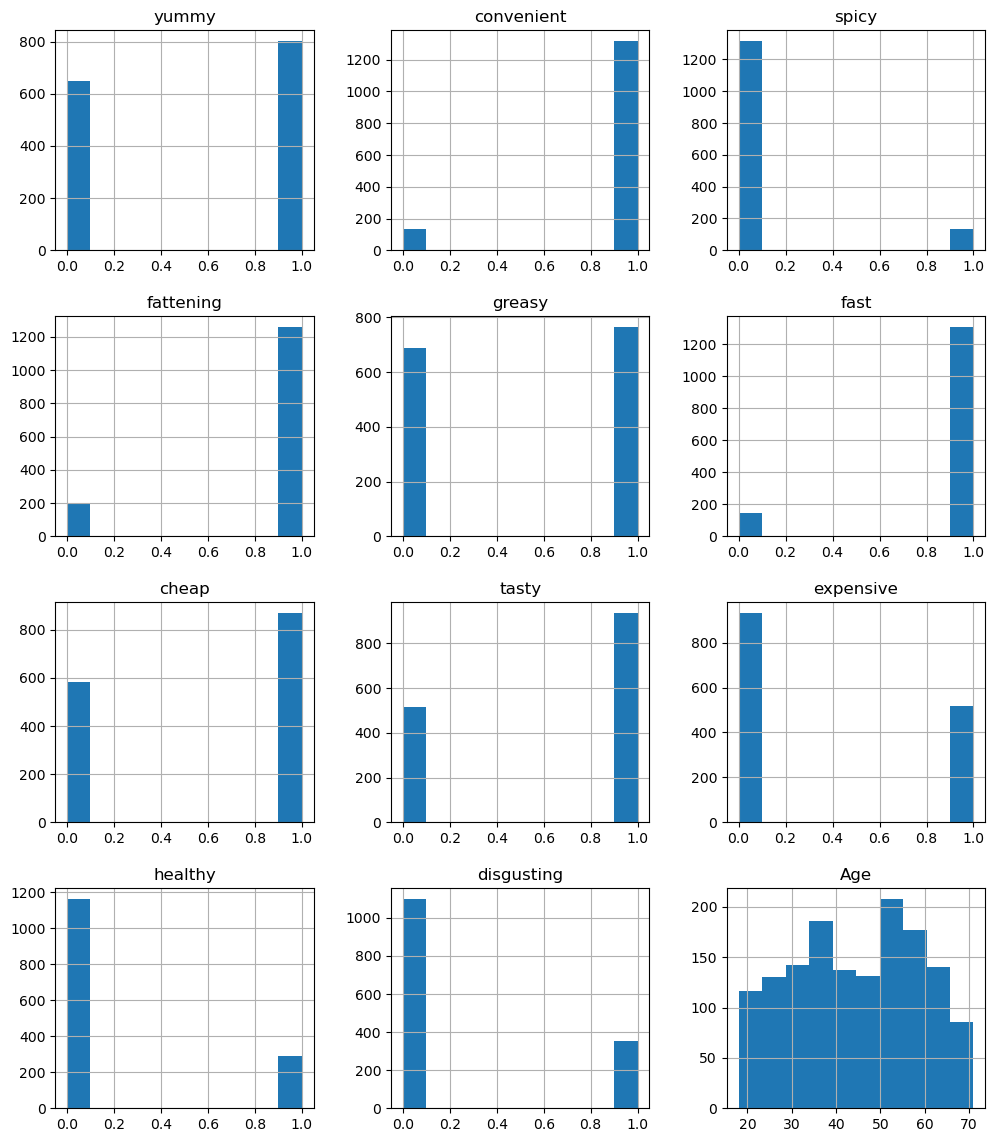

In [5]:
#Creating histograms for all columns of the dataframe 'df' and displaying them using the 'matplotlib' library.
plt.rcParams['figure.figsize'] = (12,14)
df.hist()
plt.show()

In [6]:
#Creating a new dataframe 'df_eleven' by selecting only the categorical columns 'cat' from the original dataframe 'df'.
df_eleven = df.loc[:,cat]
df_eleven

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [7]:
#'x' is assigned the values of the categorical columns.
x = df.loc[:,cat].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [8]:
#Extracting Segments
#Applying k-means clustering with 4 clusters on the categorical columns of the 'df' dataframe and storing the cluster labels in a new column 'Segment_number'. Printing the cluster labels, inertia, number of iterations, and cluster centers.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
df['Segment_number'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster. 

[2 0 0 ... 0 1 3]
1603.060444055892
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


# Describing Segments

In [9]:
#Describing Segments
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
#Creating a mosaic plot to visualize the relationship between the segment numbers and the 'Like' column of the dataframe df.
crosstab =pd.crosstab(df['Segment_number'],df['Like'])
#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
Segment_number,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


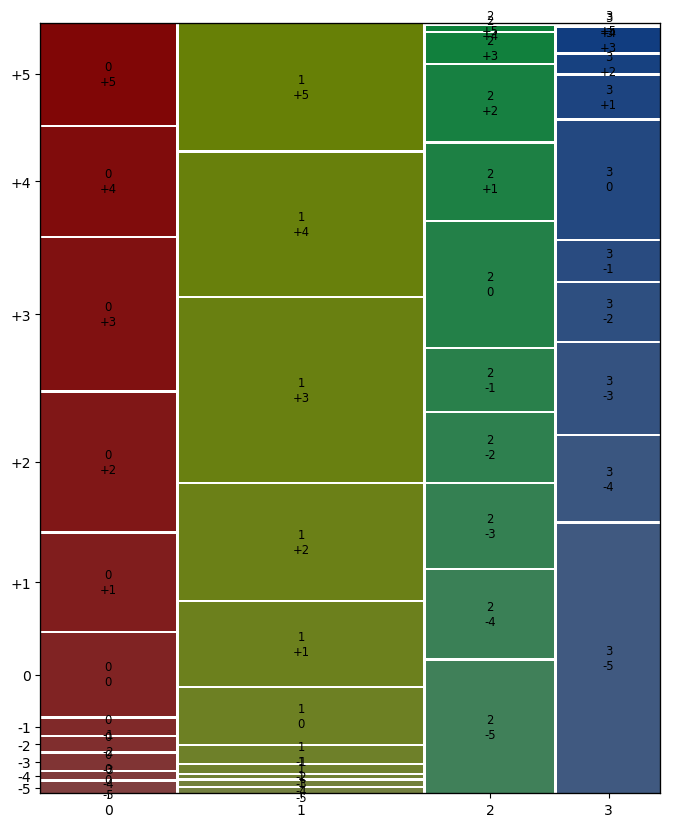

In [10]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (8,10)
mosaic(crosstab.stack())
plt.show()

In [11]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(df['Segment_number'],df['Gender'])
crosstab_gender

Gender,Female,Male
Segment_number,,
0,154,169
1,349,231
2,179,125
3,106,140


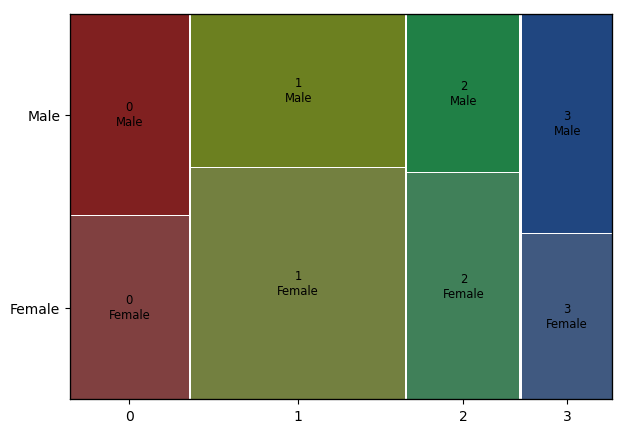

In [12]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

<AxesSubplot:xlabel='Segment_number', ylabel='Age'>

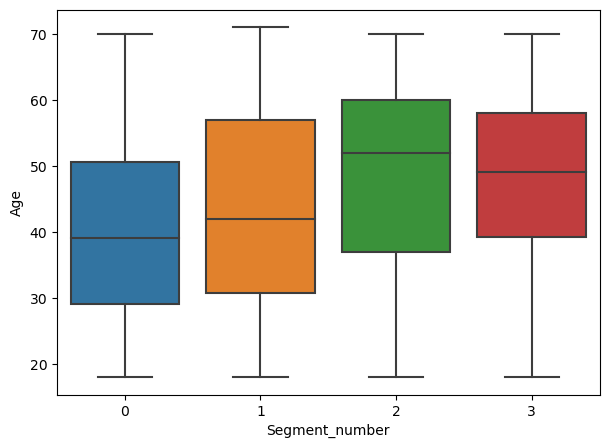

In [13]:
#box plot for age
sns.boxplot(x="Segment_number", y="Age", data=df)